In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 3: Pitches, Durations, and Notes again

Now that you've made a couple of `Note` objects, it's time
to dig a little deeper into what makes a `Note` really a
`Note`, namely, :ref:`modulePitch`, and :ref:`moduleDuration`
objects.

## The Pitch object

Since we've already covered `Note` objects, :class:`~music21.pitch.Pitch` objects
will be a breeze.  Just like how the `Note` object is found
in the `note` module, the `Pitch` object is found in the
`pitch` module.

Let's create a `Pitch`.  Like we did with `Notes`, just
class the class with a note name, such as `B` with
the optional symbols for sharp or flat, 
(*#* or *-* respectively). 

You can put an octave number after the name (4 = low treble clef), but you
don't have to:

In [2]:
from music21 import *
p1 = pitch.Pitch('b-4')

Here we'll use a more abstract variable name, `p1`
for our first `Pitch`, just in case we change the pitch
later (via `.transpose()` or something else).

Just like we saw with `Notes` there are a lot of
attributes (a.k.a. properties; we'll use the term
interchangeably for a bit before we talk about the
difference) and methods that describe and change
pitches.  The first three will be old hat from
`Note` objects:

In [3]:
p1.octave

4

In [4]:
p1.pitchClass

10

In [5]:
p1.name

'B-'

In [6]:
p1.accidental.alter

-1.0

Here are two more that you can use.  The first
is pretty self-explanatory.  The second gives the
value of the `Pitch` in the older, "MIDI" representation
that is still in use today.  It's a number between 0 and
127 where middle C (C4) is 60 and C#4/Db4 is 61, B3 is 59,
etc.

In [7]:
p1.nameWithOctave

'B-4'

In [8]:
p1.midi

70

Most of these attributes can be changed (they are
"settable properties" in Python speak).

When an attribute is set, the `Pitch` object changes whatever
is necessary to reflect the new value:

In [9]:
p1.name = 'd#'
p1.octave = 3
p1.nameWithOctave

'D#3'

And our familiar `.transpose()` method also appears on
`Pitch` as well.  Remember that `p1` is now a `D#`:

In [10]:
p2 = p1.transpose('M7')
p2

<music21.pitch.Pitch C##4>

Notice that at the command line, just printing the variable name
gives you the representation `<music21.pitch.Pitch C##4>`.  You
can also get this by typing `repr(p2)`.

So, there's really nothing new about `Pitch` objects
that you didn't already know from learning about `Notes`. So
why the two different objects?  It turns out, they are so
similar because actually every `Note` object has a `Pitch`
object inside it (like the monster in *Alien* but more
benign).  Everything that we did with the `note.Note`
object, we could do with the `note.Note.pitch` object instead:

In [11]:
csharp = note.Note('C#4')
csharp.name

'C#'

In [12]:
csharp.pitch.name

'C#'

In [13]:
csharp.octave

4

In [14]:
csharp.pitch.octave

4

But pitch objects have a lot more to offer for more technical working, for instance, `Pitch` objects know their names in Spanish:

In [15]:
csharp.pitch.spanish

'do sostenido'

Notes don't:

In [16]:
csharp.spanish

AttributeError: 'Note' object has no attribute 'spanish'

Here are some other things you can do with Pitch objects.  Get the sharp printed nicely:

In [17]:
print(csharp.pitch.unicodeName)

C♯


Get some enharmonics -- these are methods, so we add `()` to them:

In [18]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

D-4
B##3


*By the way, you know how we said that you shouldn't have
a variable named* `pitch` *because there's already a module
named* `pitch`. *You might wonder why* `Note` *objects can
have an attribute named* `pitch` *without causing any problems.
It's because the* `.pitch` *attribute is always attached to
a* `Note` *, so it's never used without a prefix of some sort
(in this case,* `csharp.pitch` *), and that's enough to
prevent any trouble.*

So far, it looks like `Pitch` objects can do everything `Note`
objects can do and more.  So why do we need `Note` objects?
It's because they also have `Duration` attributes, as we'll see
in the next section. Without a `Duration` attribute, you cannot put
an object into a Measure or show it on your screen.

Carving time with Duration objects
-------------------------------------------------

For a `Note` to occupy musical space, it has to last a certain
amount of time.  We call that time the `Note`'s :class:`~music21.duration.Duration`.
`Duration` objects are ubiquitous in music21. Nearly all objects have, 
or can have, a `Duration`. A `Duration` object can represent just about 
any time span.

`Duration` objects are best used when they're attached to something
else, like a `Note` or a `Rest`, but for now, let's look at what
we can do with them on their own.

`Duration` objects reside in the `duration` module.  When you create
a `Duration` object, you can say what type of duration you want it to
be when you create it.

Here we'll create the duration of a half note:

In [19]:
halfDuration = duration.Duration('half')

The string "half" is called the "type" of the `Duration`.
Music21 `Durations` use the common American duration types:
"whole", "half", "quarter", "eighth", "16th", "32nd", "64th".
Note that for durations shorter than an eighth note, we use
numbers instead of spelling out the whole name of the `Duration`
type.  Music21 also supports less commonly used types such as
"breve" (2 whole notes), "longa" (4 whole notes), and "maxima"
(8 whole notes) and on the other side, "128th", "256th", etc.
down to "2048th" notes. (Some of these very long and very short
notes can't be displayed in many musical notation systems,
but it's good to know that we're ready when they are).

The other standard way of creating a `Duration` is by passing it a 
number when it is created.  That number represents how many quarter
notes long it is.  So we could have created our half note `Duration`
by saying `2` or `2.0`.  But we can also create `Durations` that
aren't exactly "whole", "half", "quarter", etc.  Let's create a
dotted quarter note, which is 1.5 quarter notes long:

In [20]:
dottedQuarter = duration.Duration(1.5)

As with the `Pitch` and `Note` objects we've already seen, there
are a bunch of attributes that `Duration` objects have.  The
most important one is `.quarterLength`.  The :attr:`~music21.duration.Duration.quarterLength` 
of our `dottedQuarter` variable is of course 1.5: we set it to be.
But just as importantly, the `halfDuration` object also
has its quarterLength set:

In [21]:
dottedQuarter.quarterLength

1.5

In [22]:
halfDuration.quarterLength

2.0

The `.type` attribute tells you what general type of `Duration`
you have:

In [23]:
halfDuration.type

'half'

In [24]:
dottedQuarter.type

'quarter'

The `type` attribute cannot be everything that describes the
`Duration`, there has to be some place where music21 keeps
track of the fact that the `dottedQuarter` variable has a dot
(otherwise it wouldn't have a `quarterLength` of 1.5).  You'll
find the attribute called `.dots`:

In [25]:
halfDuration.dots

0

In [26]:
dottedQuarter.dots

1

The attributes of `dots`, `type`, and `quarterLength` are
actually special attributes called "properties".  A property
is an attribute that is smart in some way.  Let's change the
number of dots on our `dottedQuarter` object and see what
happens to the `quarterLength` property:

In [27]:
dottedQuarter.dots = 2
dottedQuarter.quarterLength

1.75

In [28]:
dottedQuarter.dots = 3
dottedQuarter.quarterLength

1.875

In [29]:
dottedQuarter.dots = 4
dottedQuarter.quarterLength

1.9375

Or let's change the `quarterLength` of the dottedQuarter and
see what happens to the `type` and `dots`:

In [30]:
dottedQuarter.quarterLength = 0.25
dottedQuarter.type

'16th'

In [31]:
dottedQuarter.dots

0

QuarterLengths are so important to music21 that we'll sometimes
abbreviate them as `qL` or `qLs`.  Almost everything that is
measured in music21 is measured in `qLs`.  

Music21 can also deal with other `quarterLengths` such as 0.8,
which is 4/5ths of a quarter note, or 1/3 which is an eighth note triplet.

Just be careful when creating triplets, because of a weird Python 2 quirk
that makes it so that if you divide two integers with "/" you always get back just
the integer part of the number, so 8/3 is 2, since 8/3 is 2.66666... and
the integer part is 2.  I will use "//" in this example, since "//" appears
in both Python 2 and Python 3 and is equivalent to Python 2's "/"

In [32]:
8//3

2

In [33]:
1//3

0

To get the number you probably want either use Python 3 or make sure that at least one
of the numbers you are dividing is a float.  So:

In [34]:
8.0/3.0

2.6666666666666665

In [35]:
1.0/3

0.3333333333333333

You can go ahead and make a Triplet or other :class:`~music21.duration.Tuplet`
now, but we'll get to Triplets later.

Back to Notes
-------------------------------------------------

So now you can see the advantage of working with `Note` objects: they
have both a `.pitch` attribute, which contains a `Pitch` object, and
a `.duration` attribute, which contains a `Duration` object.  The
default `Pitch` for a `Note` is `C` (meaning `C4`) 
and the default `Duration` is 1.0, or a quarter note.

In [36]:
n1 = note.Note()
n1.pitch

<music21.pitch.Pitch C4>

In [37]:
n1.duration

<music21.duration.Duration 1.0>

But we can play around with them:

In [38]:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

and then the other properties change accordingly:

In [39]:
n1.duration.type

'half'

In [40]:
n1.duration.dots

1

In [41]:
n1.pitch.name

'E-'

In [42]:
n1.pitch.accidental

<accidental flat>

In [43]:
n1.octave

5

We already said that some of the attributes of `Pitch` can
also be called on the `Note` object itself.  The same is
true for the most important attributes of `Duration`:

In [44]:
n1.name

'E-'

In [45]:
n1.quarterLength

3.0

Let's change the quarterLength back to 1.0 for now:

In [46]:
n1.quarterLength = 1.0

`Notes` can do things that neither `Pitch` or `Duration`
objects can do.  For instance, they can have lyrics.
Let's add some lyrics to `Notes`.  You can easily set :class:`~music21.note.Lyric`
objects just by setting the :meth:`lyric <music21.note.GeneralNote.lyric>` property. (For reference, the `lyric` attribute is actually an attribute of :class:`~music21.note.GeneralNote`, which is a "base class" from which the `Note` class "inherits". In other words, the `Note` class gains the `lyric` attribute from `GeneralNote`. But that's not too important.)

In [47]:
otherNote = note.Note("F6")
otherNote.lyric = "I'm the Queen of the Night!"

But let's do something more complex.  Here I add multiple lyrics
to `n1` using the `Note's` :meth:`~music21.note.GeneralNote.addLyric` method.
And instead of adding a simple String, I'll add as a lyric the name of the
note itself and its `pitchClassString`. 

In [48]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

Finally, lets put the `quarterLength` of the note as a string with a
preface "QL: ":

In [49]:
n1.addLyric('QL: %s' % n1.quarterLength)

The format '`QL: %s`' says to put the first thing outside the quotes
in place of `%s` as a string (the "s" in `%s` means to make it a
string.  Remember that `.quarterLength` is not a string, but a 
float).

As it should be becoming clear, we can always check our work 
with the :meth:`~music21.base.Music21Object.show` method.

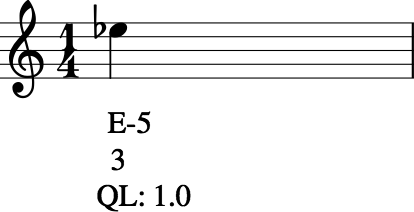

In [50]:
n1.show()

If we now edit the :meth:`quarterLength <music21.base.Music21Object.quarterLength>` property we can still change the
`Note`'s `Duration`. But because we already set the lyric to show
"`QL: 1.0`, it won't be changed when we `.show()` it again in the following 
example.

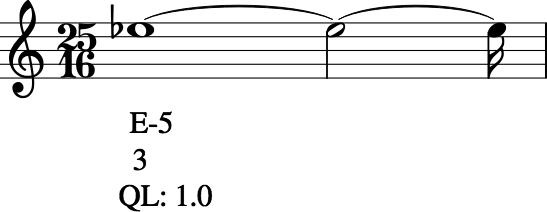

In [51]:
n1.quarterLength = 6.25
n1.show()

There many more things we can do with a `Note` object, but
I'm itching to look at what happens when we put multiple
`Notes` together in a row.  And to do that we'll need to
learn a bit about the topic of :ref:`Chapter 4: Streams <usersGuide_04_stream1>`. 